# import the required packages

In [1]:
import numpy as np
import pandas as pd

In [2]:
# load the data
data = pd.read_csv('netmed_data.csv')
data

,Unnamed: 0,Medicine Name,Composition,Manufacturer,MRP,Best Price
0,1,Atrest 12.5mg Tablet 10'S,TETRABENAZINE 12.5MG,ADHD,154.04,123.23
1,2,Atrest 25mg Tablet 10'S,TETRABENAZINE 25MG,ADHD,261.49,209.19
2,3,Capnea Injection 1ml,Caffeine Citrate 20 MG,ADHD,277.38,249.64
3,4,COGNIX + Tablet 10's,GINKGO BILOBA 120 mg,ADHD,117.00,93.60
4,5,NOR 4mg Injection 2ml,NOREPINEPHRINE 4MG,ADHD,56.00,50.40
...,...,...,...,...,...,...
27440,27441,Clearvital Cream 30gm,SKIN CARE PREPARATION,Wrinkle/Anti Ageing,112.00,89.60
27441,27442,DS GOLD ANTI AGEING Cream 50gm,SKINCARE PREPARATION,Wrinkle/Anti Ageing,999.00,799.20
27442,27443,Nt Age Cream 50gm,ALLANTOIN+ALOE VERA+MAGNESIUM ALUMINIUM SILI...,Wrinkle/Anti Ageing,899.00,719.20
27443,27444,Versa Gel 30gm,DICLOFENAC 1.16 %+LINSEED OIL 3 %+MENTHOL 5 ...,Wrinkle/Anti Ageing,79.50,63.60


# DATA CLEANING and Data Processing

In [3]:
#DROPING UNWANTED COLUMN
data = data.drop(data.columns[0], axis=1)
data.head()

,Medicine Name,Composition,Manufacturer,MRP,Best Price
0,Atrest 12.5mg Tablet 10'S,TETRABENAZINE 12.5MG,ADHD,154.04,123.23
1,Atrest 25mg Tablet 10'S,TETRABENAZINE 25MG,ADHD,261.49,209.19
2,Capnea Injection 1ml,Caffeine Citrate 20 MG,ADHD,277.38,249.64
3,COGNIX + Tablet 10's,GINKGO BILOBA 120 mg,ADHD,117.00,93.60
4,NOR 4mg Injection 2ml,NOREPINEPHRINE 4MG,ADHD,56.00,50.40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27445 entries, 0 to 27444
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Medicine Name  27445 non-null  object 
 1   Composition    27425 non-null  object 
 2   Manufacturer   27445 non-null  object 
 3   MRP            27445 non-null  object 
 4   Best Price     27445 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.0+ MB


# Converting the datatype to float

In [5]:
# Step 2: Convert the cleaned MRP column to float
data['MRP'] = pd.to_numeric(data['MRP'], errors='coerce')

In [6]:
print(data.shape)
data.info()

(27445, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27445 entries, 0 to 27444
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Medicine Name  27445 non-null  object 
 1   Composition    27425 non-null  object 
 2   Manufacturer   27445 non-null  object 
 3   MRP            27439 non-null  float64
 4   Best Price     27445 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.0+ MB


# CHECKING THE NULL VALUES AND DROPING THEM

In [7]:
data.isnull().sum()
data = data.dropna() 
print(data.shape)

(27425, 5)


In [8]:
data.head()

,Medicine Name,Composition,Manufacturer,MRP,Best Price
0,Atrest 12.5mg Tablet 10'S,TETRABENAZINE 12.5MG,ADHD,154.04,123.23
1,Atrest 25mg Tablet 10'S,TETRABENAZINE 25MG,ADHD,261.49,209.19
2,Capnea Injection 1ml,Caffeine Citrate 20 MG,ADHD,277.38,249.64
3,COGNIX + Tablet 10's,GINKGO BILOBA 120 mg,ADHD,117.00,93.60
4,NOR 4mg Injection 2ml,NOREPINEPHRINE 4MG,ADHD,56.00,50.40


In [9]:
print(data.iloc[5673])
print(data.columns)

Medicine Name    Lenalid 15mg Capsule 30'S
Composition            LENALIDOMIDE 15MG  
Manufacturer               Cancer/Oncology
MRP                                6294.85
Best Price                         5665.37
Name: 5673, dtype: object
Index(['Medicine Name', 'Composition', 'Manufacturer', 'MRP', 'Best Price'], dtype='object')


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27425 entries, 0 to 27444
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Medicine Name  27425 non-null  object 
 1   Composition    27425 non-null  object 
 2   Manufacturer   27425 non-null  object 
 3   MRP            27425 non-null  float64
 4   Best Price     27425 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.3+ MB


# CREATING A NEW COLUMNS FOR STATISTICAL ANALYSIS

In [11]:
data['Price Difference'] = data['MRP'] - data['Best Price']
data['Discount Percentage'] = ((data['MRP'] - data['Best Price']) / data['MRP']) * 100

In [12]:
data.sample(50)

,Medicine Name,Composition,Manufacturer,MRP,Best Price,Price Difference,Discount Percentage
9992,Lozisoft Cream 50gm,LIGHT LIQUID PARAFFIN 10.2 % w/w+WHITE SOFT ...,Dry Skin,125.00,100.00,25.00,20.000000
19435,TOLKEM SR 450mg Tablet 10's,TOLPERISONE 450 mg,Muscle Spasm,370.00,296.00,74.00,20.000000
4299,BIOTOR CV 10 Capsule 10's,ATORVASTATIN 10 mg+CLOPIDOGREL 75 mg,Blood Clot,95.00,76.00,19.00,20.000000
18792,MGR 10mg Tablet 10'S,FLUNARIZINE 10MG,Migraine,51.86,46.67,5.19,10.007713
17689,Cidaflox 200mg Tablet 10'S,CEFPODOXIME PROXETIL 200MG,Infection,173.00,138.40,34.60,20.000000
14071,Bestor 20mg Tablet 10'S,ROSUVASTATIN 20 mg,High Cholesterol,263.21,210.57,52.64,19.999240
11309,FLOMO Eye Ointment 5gm,MOXIFLOXACIN 5 mg,Eye conditions,68.00,54.40,13.60,20.000000
389,Alecloz 180mg Tablet 10'S,FEXOFENADINE HYDROCHLORIDE 180MG,Allergies,140.00,112.00,28.00,20.000000
4966,Zolasta 4mg Injection 1'S,Zoledronic Acid 4 mg,Bone Metabolism,3664.05,3297.65,366.40,9.999864
13106,Brimo Eye Drops 5ml,BRIMONIDINE 0.15 %,Glaucoma,285.00,228.00,57.00,20.000000


# what is the highest price of the medicine

In [13]:
max = data['MRP'].max()
max

665000.0

In [14]:
data.describe()

,MRP,Best Price,Price Difference,Discount Percentage
count,27425.000000,27425.000000,27425.000000,27425.000000
mean,747.795720,624.527515,123.268205,17.878310
std,6146.217911,5029.031234,1147.193431,4.120804
min,1.550000,0.000000,0.150000,9.677419
25%,69.000000,56.000000,12.000000,19.999284
50%,129.000000,104.720000,23.980000,20.000000
75%,245.000000,198.000000,46.000000,20.000000
max,665000.000000,532000.000000,133000.000000,100.000000


# OUTLIER DETECTION

In [15]:
# using Z-score test for detecting outlier
# importing stats from scipy

In [16]:
from scipy import stats

# Calculate Z-scores
data['Z_MRP'] = stats.zscore(data['MRP'])
data['Z_Best_Price'] = stats.zscore(data['Best Price'])

# Identify outliers based on Z-score threshold
threshold = 3
outliers = data[(data['Z_MRP'].abs() > threshold) | (data['Z_Best_Price'].abs() > threshold)]

# Display outliers
outliers[['Medicine Name','Composition', 'MRP', 'Best Price']]


,Medicine Name,Composition,MRP,Best Price
2289,Vascium 18mg Injection 1'S,RETEPLASE(RECOMBINANT TISSUE PLASMINOGEN ACT...,28333.32,22666.66
2408,Actemra 200mg Injection 1'S,TOCILIZUMAB 200MG,20274.00,16219.20
2409,Actemra 400mg Injection 1'S,TOCILIZUMAB 400MG,40600.00,32480.00
2412,Adalirel 40mg Injection 1'S,ADALIMUMAB 40MG,22000.00,17600.00
2540,Xeljanz 5mg Tablet 60'S,Tofacitinib 5 MG,66344.00,53075.20
...,...,...,...,...
26855,Sofokem L Tablet 28'S,SOFOSBUVIR 400MG+LEDIPASVIR 90MG,23940.43,19152.34
26856,Sovihep 400mg Tablet 28'S,SOFOSBUVIR 400MG,20484.57,18436.11
26904,Valcyte 450mg Tablet 60'S,VALGANCICLOVIR 450 mg,40000.00,32000.00
26922,Viroclear 400mg Tablet 28'S,SOFOSBUVIR 400MG,18993.00,17093.70


# What is the Outlier medicine Price Range

In [17]:
# so the outlier price range is 
Min = pd.DataFrame(outliers.min())
Max = pd.DataFrame(outliers.max())

In [18]:
Min 

,0
Medicine Name,ABIRATRED 500mg Tablet 60's
Composition,ABCIXIMAB 10MG
Manufacturer,Angina
MRP,17466.04
Best Price,15385.6
Price Difference,1746.6
Discount Percentage,9.999975
Z_MRP,2.720136
Z_Best_Price,2.935226


In [19]:
Max

,0
Medicine Name,Xgeva 120mg Injection 1.7ml
Composition,VALGANCICLOVIR 450 mg
Manufacturer,Viral infections
MRP,665000.0
Best Price,532000.0
Price Difference,133000.0
Discount Percentage,20.000017
Z_MRP,108.076922
Z_Best_Price,105.663524


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

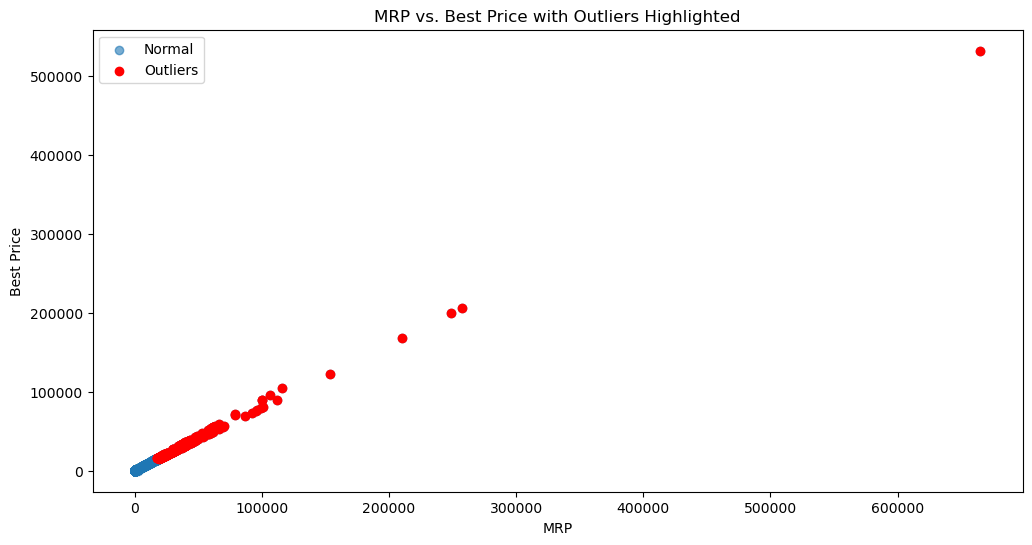

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(data['MRP'], data['Best Price'], alpha=0.6, label='Normal')
plt.scatter(outliers['MRP'], outliers['Best Price'], color='red', label='Outliers')
plt.title('MRP vs. Best Price with Outliers Highlighted')
plt.xlabel('MRP')
plt.ylabel('Best Price')
plt.legend()
plt.show()

# Easily Affordable medicies, Medicines that are under the price range of 2000

In [22]:
# No of Medicine that are under 

In [23]:
# Filter medicines with MRP between 0 and 17466.04
filtered_medicines = data[(data['MRP'] >= 0) & (data['MRP'] <= 17466.04)]
print('The no of medicine that are under price range 2000::')
filtered_medicines['MRP'].count()
# Display the filtered medicines
#print(filtered_medicines[['Medicine Name', 'Composition', 'Manufacturer', 'MRP', 'Best Price']].sum())

The no of medicine that are under price range 2000::


27194

# Visualisation of the above

C:\Users\hashi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


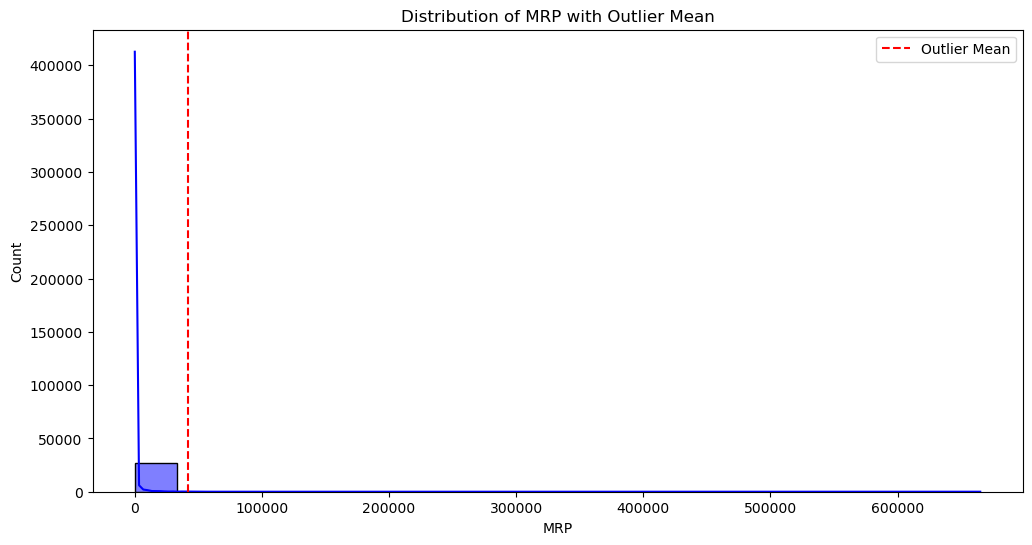

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(data['MRP'], bins=20, kde=True, color='blue', alpha=0.5)
plt.axvline(outliers['MRP'].mean(), color='red', linestyle='--', label='Outlier Mean')
plt.title('Distribution of MRP with Outlier Mean')
plt.xlabel('MRP')
plt.legend()
plt.show()

C:\Users\hashi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


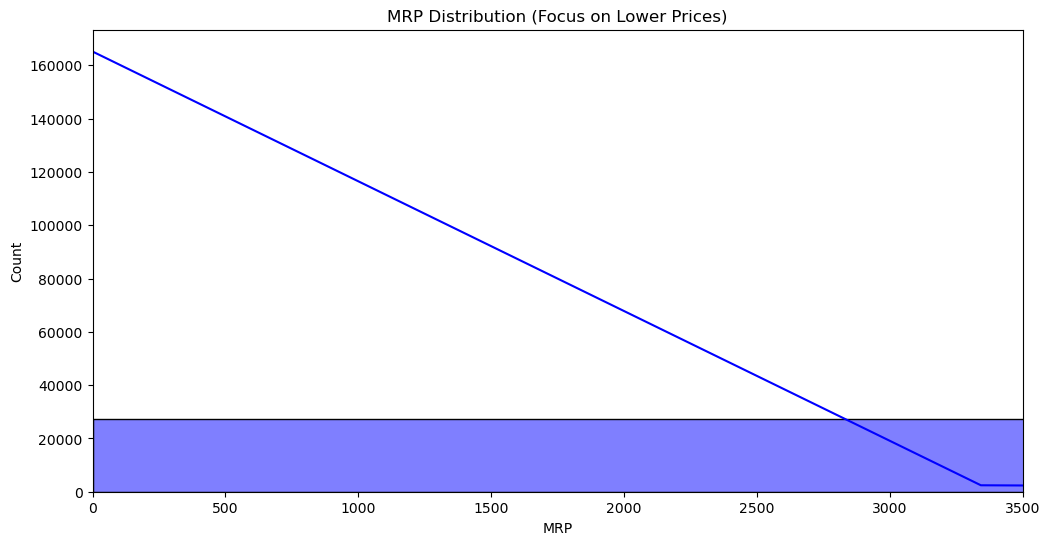

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(data['MRP'], bins = 50, kde=True, color='blue')
plt.xlim(0, 3500)  # Focus on lower price range
plt.title('MRP Distribution (Focus on Lower Prices)')
plt.xlabel('MRP')
plt.show()

# Expensive medicines that are above the range of 3000

In [26]:
filtered_medicines_above_5000 = data[data['MRP'] > 17466.04]
filtered_medicines_above_5000['MRP'].count()

231

# This histogram shows that total no of medicines is #27425# out of which most are from the range of 0-3000
# it means that only 231 medicines prices are more than 3000

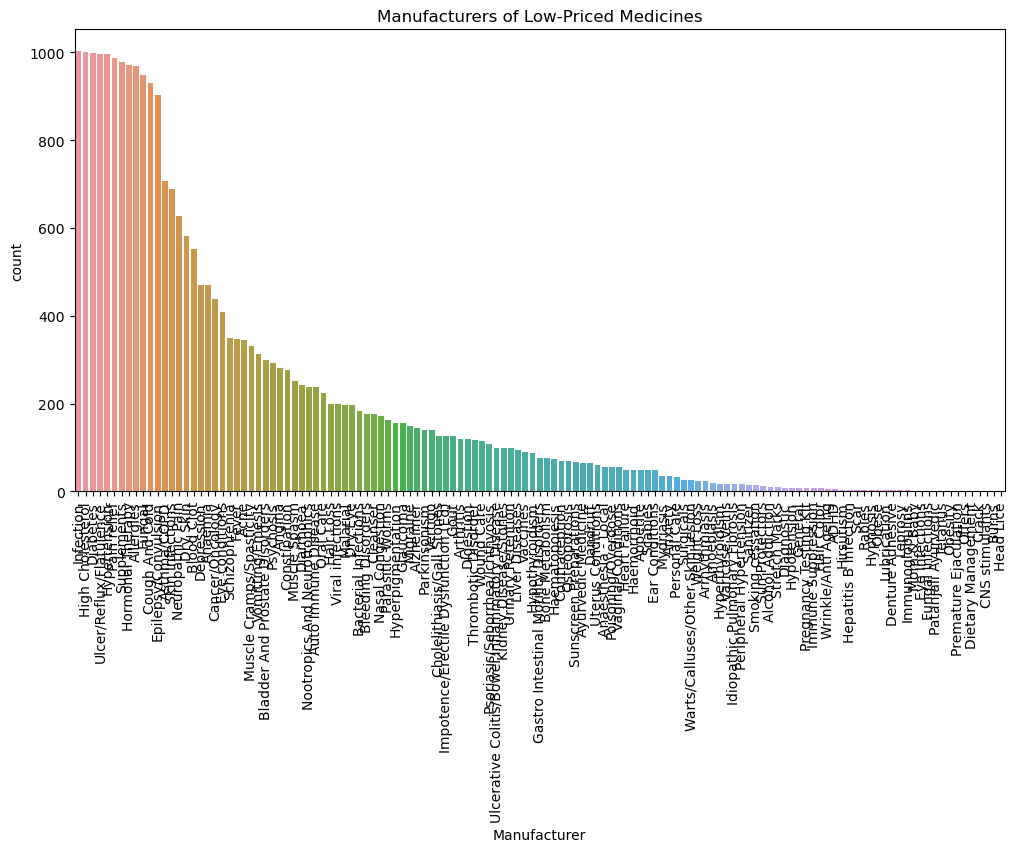

In [27]:
# Analyzing manufacturers for low-priced medicines
low_priced_medicines = data[data['MRP'] < 2000]
plt.figure(figsize=(12, 6))
sns.countplot(x='Manufacturer', data=low_priced_medicines, order=low_priced_medicines['Manufacturer'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Manufacturers of Low-Priced Medicines')
plt.show()

In [28]:
# Filter for low-priced medicines (e.g., MRP < 5000)
low_priced_medicines = data[data['MRP'] < 5000]

# Get the unique list of manufacturers and their count
low_price_manufacturers = low_priced_medicines['Manufacturer'].value_counts()

# Using a for loop to print each manufacturer and its count
for manufacturer, count in low_price_manufacturers.items():
    print(f"Manufacturer: {manufacturer}, Count: {count}")
    

Manufacturer: Infection, Count: 1005
Manufacturer: Diabetes, Count: 1000
Manufacturer: High Cholesterol, Count: 1000
Manufacturer: Hypertension, Count: 998
Manufacturer: Ulcer/Reflux/Flatulence, Count: 997
Manufacturer: Hormonal Therapy, Count: 988
Manufacturer: Pain relief, Count: 987
Manufacturer: Supplements, Count: 981
Manufacturer: Allergies, Count: 969
Manufacturer: Fungal, Count: 963
Manufacturer: Cough And Cold, Count: 930
Manufacturer: Epilepsy/Convulsion, Count: 902
Manufacturer: Asthma/COPD, Count: 714
Manufacturer: Skin Infections, Count: 691
Manufacturer: Cancer/Oncology, Count: 654
Manufacturer: Neuropathic Pain, Count: 627
Manufacturer: Dry Skin, Count: 596
Manufacturer: Blood Clot, Count: 570
Manufacturer: Anaemia, Count: 480
Manufacturer: Depression, Count: 471
Manufacturer: Eye conditions, Count: 410
Manufacturer: Schizophrenia, Count: 350
Manufacturer: Fever, Count: 348
Manufacturer: Acne, Count: 345
Manufacturer: Muscle Cramps/Spasticity, Count: 331
Manufacturer: Vo

# Descriptive Analysis (Price Differences and Discounts)

C:\Users\hashi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


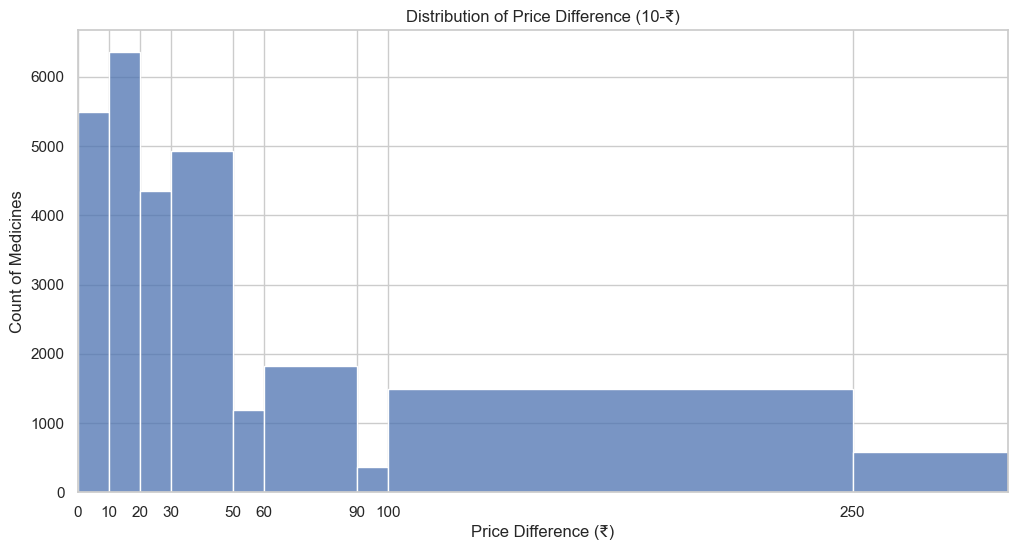

In [29]:
# Filter price differences between 10 and 40
filtered_prices = data[(data['Price Difference'] >= 0) & (data['Price Difference'] <= 1000)]

# Set the aesthetics for the plot
sns.set(style='whitegrid')

# Plotting the histogram
plt.figure(figsize=(12, 6))
sns.histplot(filtered_prices['Price Difference'], bins=[0, 10, 20, 30, 50, 60, 90, 100, 250, 500], kde=False)
plt.title('Distribution of Price Difference (10-₹)')
plt.xlabel('Price Difference (₹)')
plt.ylabel('Count of Medicines')
plt.xticks([0, 10, 20, 30, 50, 60, 90, 100, 250, 500])  # Set x-ticks to specific values
plt.xlim(0, 300)  # Limit x-axis range
plt.show()



In [30]:
# It shows that the maximum medicine has difference in Price of atleast 25₹-50₹
# and there are few medicine with the price difference of 100₹-200₹

In [31]:
# What is the maximum discount given on a medicine

C:\Users\hashi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


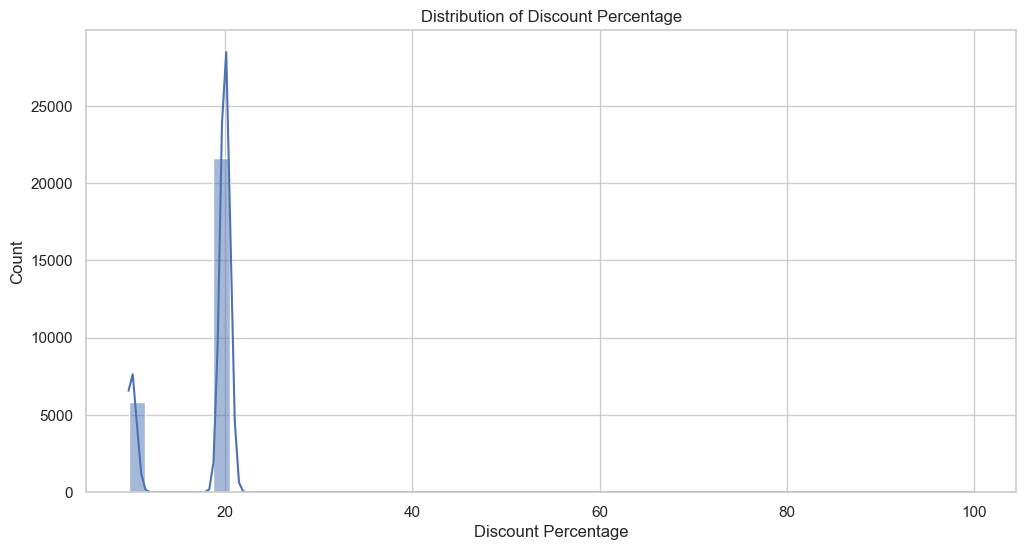

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Discount Percentage'], bins=50, kde=True)
plt.title('Distribution of Discount Percentage')
plt.show()

In [33]:
# It shows that the maximum discount for the medicine is 20% and minimum is 10%

# Category-Based Analysis (Manufacture/Medical Category)

                                         MRP  Best Price
Manufacturer                                            
ADHD                              173.182000  145.212000
Acne                              303.605501  243.419713
Alcohol Addiction                 378.764545  303.011818
Allergies                          94.667719   76.129876
Alzheimer                         500.854631  402.367114
...                                      ...         ...
Vomitting/Emesis                   69.220479   57.854633
Warts/Calluses/Other Skin Lesion  177.690800  142.778000
Weight Loss                       433.434167  346.747500
Wound Care                        182.485565  154.858261
Wrinkle/Anti Ageing               703.083333  562.466667

[130 rows x 2 columns]


<Figure size 1200x1000 with 0 Axes>

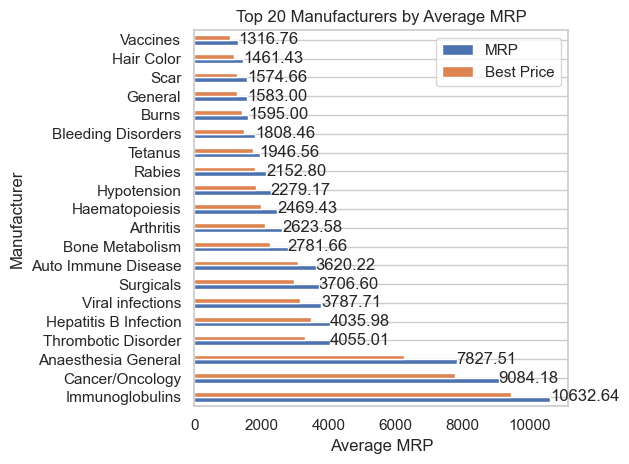

In [34]:
import matplotlib.pyplot as plt
# Average prices by Manufacturer
manufacturer_group = data.groupby('Manufacturer').agg({'MRP': 'mean', 'Best Price': 'mean'})
print(manufacturer_group)
# Get the top 20 manufacturers by average MRP
top_manufacturer_group = manufacturer_group.nlargest(20, 'MRP')

plt.figure(figsize=(12, 10))
top_manufacturer_group.plot(kind='barh')

plt.title('Top 20 Manufacturers by Average MRP')
plt.xlabel('Average MRP')
plt.ylabel('Manufacturer')
plt.grid(axis='x')

# Annotate bars with their values
for index, value in enumerate(top_manufacturer_group['MRP']):
    plt.text(value, index, f'{value:.2f}', va='center')  # Value for MRP

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


                                                              MRP  \
Composition                                                         
  ALEMTUZUMAB 12 MG                                 665000.000000   
  RAMUCIRUMAB 500MG                                 257532.000000   
  ADO TRASTUZUMAB 160 mg                            248937.000000   
  Pembrolizumab 100 MG                              210400.000000   
  ADO TRASTUZUMAB 100 MG                            153429.000000   
  CASPOFUNGIN 75MG                                  111888.000000   
  CRIZOTINIB 250MG                                  106270.300000   
  CETUXIMAB 500MG                                   101110.000000   
  CRIZOTINIB 200MG                                  100177.500000   
  Nivolumab 100 MG                                   99500.000000   
  RECOMBINANT FACTOR VII(RFVIIA)EPTACOG ALFA 2 ...   86900.000000   
  RANIBIZUMAB 0.5MG                                  70160.000000   
  TUROCTOCOG ALFA(ANTIHEMOPHILIC F

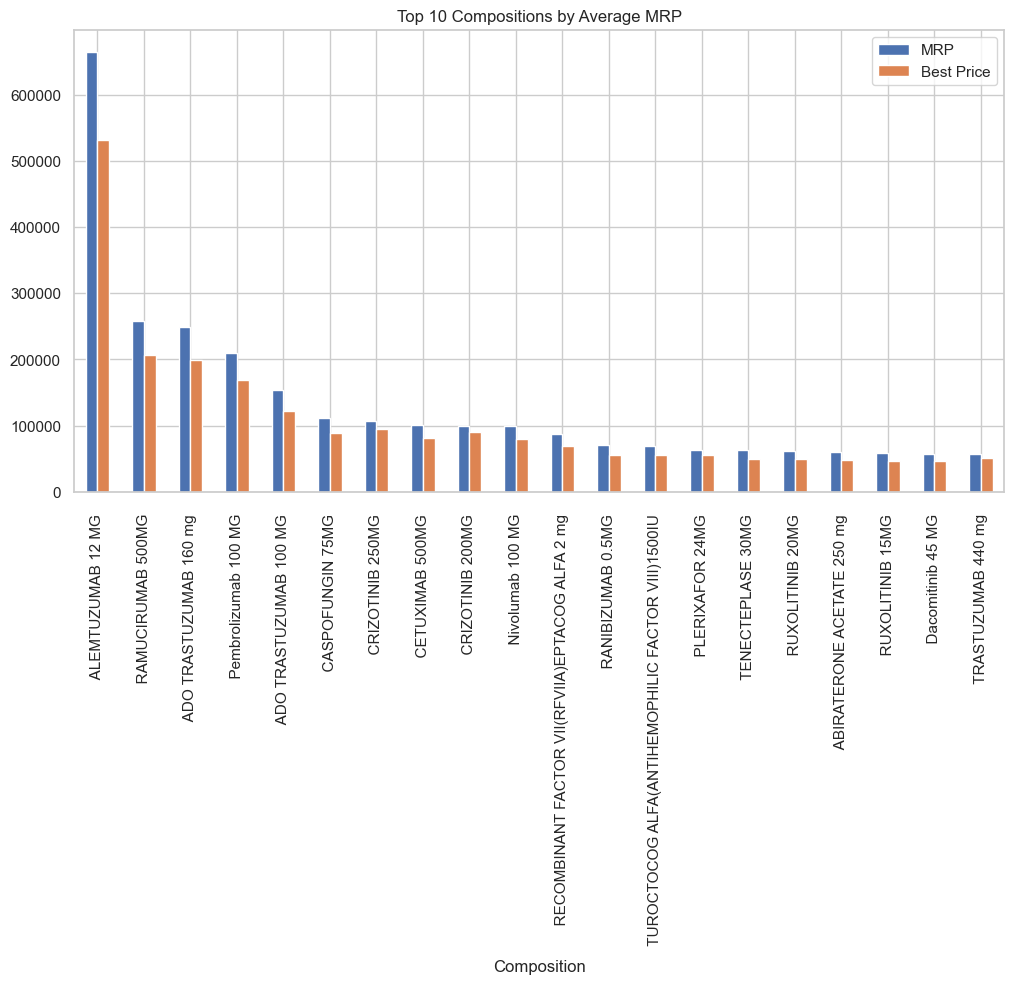

In [35]:
# Average prices by Composition
composition_group = data.groupby('Composition').agg({'MRP': 'mean', 'Best Price': 'mean'}).sort_values(by='MRP', ascending=False)
print(composition_group.head(20))  # Top 10 compositions by average MRP

# Visualize top 10 compositions by MRP
composition_group.head(20).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Compositions by Average MRP')
plt.show()


# top Expensive mediciine

In [36]:
# Top 10 most expensive by MRP
top_mrp = data.nlargest(20, 'MRP')
top_mrp[['Medicine Name', 'MRP', 'Manufacturer', 'Best Price']]

,Medicine Name,MRP,Manufacturer,Best Price
5670,LEMTRADA 12mg Infusion 1's,665000.0,Cancer/Oncology,532000.00
5263,Cyramza 500mg Injection 50ml,257532.0,Cancer/Oncology,206025.60
5649,Kadcyla 160mg Injection 8ml,248937.0,Cancer/Oncology,199149.60
5656,KEYTRUDA 100mg Injection 4ml,210400.0,Cancer/Oncology,168320.00
5648,Kadcyla 100mg Injection 1'S,153429.0,Cancer/Oncology,122743.20
5064,Avastin 400mg Injection 16ml,116000.0,Cancer/Oncology,104400.00
12068,Cancidas 75mg Injection 10ml,111888.0,Fungal,89510.40
5251,Crizalk 250mg Capsule 60'S,106270.3,Cancer/Oncology,95643.27
5422,Erbitux 500mg Infusion 50ml,101110.0,Cancer/Oncology,80888.00
5250,Crizalk 200mg Capsule 60'S,100177.5,Cancer/Oncology,90159.75


In [37]:
# Top 10 most expensive by Best Price
top_best_price = data.nlargest(20, 'Best Price')
top_best_price[['Medicine Name', 'MRP', 'Manufacturer', 'Best Price']]

,Medicine Name,MRP,Manufacturer,Best Price
5670,LEMTRADA 12mg Infusion 1's,665000.00,Cancer/Oncology,532000.00
5263,Cyramza 500mg Injection 50ml,257532.00,Cancer/Oncology,206025.60
5649,Kadcyla 160mg Injection 8ml,248937.00,Cancer/Oncology,199149.60
5656,KEYTRUDA 100mg Injection 4ml,210400.00,Cancer/Oncology,168320.00
5648,Kadcyla 100mg Injection 1'S,153429.00,Cancer/Oncology,122743.20
5064,Avastin 400mg Injection 16ml,116000.00,Cancer/Oncology,104400.00
5251,Crizalk 250mg Capsule 60'S,106270.30,Cancer/Oncology,95643.27
5250,Crizalk 200mg Capsule 60'S,100177.50,Cancer/Oncology,90159.75
5643,Jevtana 60mg Injection 1.5ml,99999.00,Cancer/Oncology,89999.10
12068,Cancidas 75mg Injection 10ml,111888.00,Fungal,89510.40


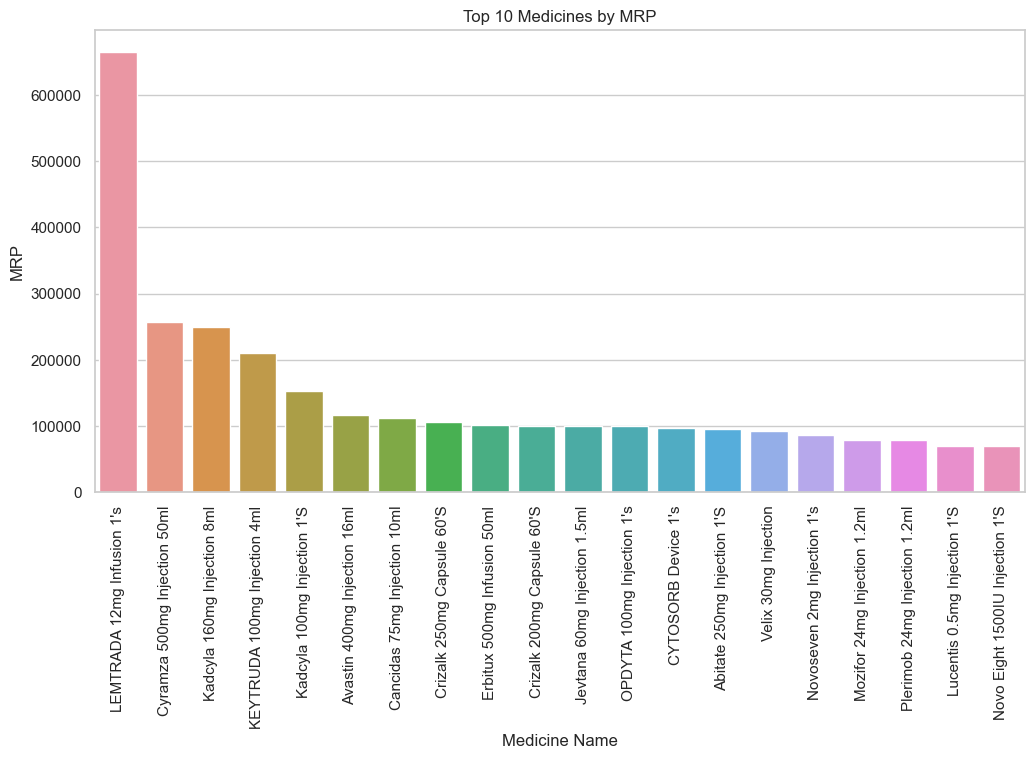

In [38]:
# Visualize the most expensive medicines
plt.figure(figsize=(12, 6))
sns.barplot(x='Medicine Name', y='MRP', data=top_mrp)
plt.title('Top 10 Medicines by MRP')
plt.xticks(rotation=90)
plt.show()

In [39]:
# List of medicine names and categories
medicines = [
    "ADHD", "Acne", "Alcohol Addiction", "Allergies", "Alzheimer", "Amoebiasis", 
    "Anaemia", "Anaesthesia - Local", "Anaesthesia General", "Angina", "Anxiety", 
    "Appetite", "Arrhythmiasis", "Arthritis", "Asthma/COPD", "Auto Immune Disease", 
    "Ayurvedic Medicine", "Bacterial Infections", "Bladder And Prostate Disorders", 
    "Bleeding Disorders", "Blood Clot", "Bone Metabolism", "Burns", "CNS stimulants", 
    "Cancer/Oncology", "Cholelithiasis/Gall Stones", "Cleanser", "Constipation", 
    "Contraception", "Cough And Cold", "Crack", "Dandruff", "Denture Adhesive", 
    "Depression", "Diabetes", "Diagnostic", "Diarrhoea", "Dietary Management", 
    "Digestion", "Dry Eye", "Dry Skin", "Personal Care", "Ear Conditions", 
    "Epilepsy/Convulsion", "Eye Infections", "Eye conditions", "Glaucoma", "Infection", 
    "Fever", "Fungal", "Fungal Infections", "Gastro Intestinal Motility Disorders", 
    "General", "Gout", "Haematopoiesis", "Haemorrhoid", "Hair Color", "Hair Loss", 
    "Head Lice", "Heart Failure", "Hepatitis B Infection", "High Cholesterol", 
    "Hirsutism", "Hormonal Therapy", "Hyperpigmentation", "Hypertension", 
    "Hyperthyroidism", "Hypnosis", "Hypotension", "Nasal Congestion", "Hypothyroidism", 
    "Idiopathic Pulmonary Fibrosis", "Immune Suppression", "Immunoglobulins", 
    "Impotence/Erectile Dysfunction (Ed)", "Kidney Disease/Stones", "Leprosy", 
    "Liver Diseases", "Lubrication", "Malarial", "Migraine", "Muscle Cramps/Spasticity", 
    "Muscle Spasm", "Urinary Retention", "Neuropathic Pain", "Mydriasis", "Mom & Baby", 
    "Nootropics And Neurotrophics", "Obese", "Obesity", "Oral Care", "Osteoporosis", 
    "Pain relief", "Parasitic Worms", "Parkinsonism", "Patanjali Ayurvedic", 
    "Peripheral Hypertension", "Poisoning/Overdose", "Pregnancy Testing Kit", 
    "Premature Ejaculation", "Psoriasis/Seborrhea/Ichthyosis", "Psychosis", 
    "Rabies", "Sanitizer", "Offers", "Scabies", "Scar", "Schizophrenia", 
    "Skin Infections", "Smoking cessation", "Stretch Marks", "Sun Protectors", 
    "Sunscreen Preparations", "Supplements", "Surgicals", "Tetanus", 
    "Thrombotic Disorder", "Ulcer/Reflux/Flatulence", 
    "Ulcerative Colitis/Bowel Inflammatory Disease", "Uterus Conditions", 
    "Vaccines", "Vaginal Conditions", "Varicose Veins", "Vertigo", 
    "Viral infections", "Vomitting/Emesis", "Warts/Calluses/Other Skin Lesion", 
    "Weight Loss", "Wound Care", "Wrinkle/Anti Ageing"
]

In [40]:
# Define categories
categories = {
    "Hormonal Therapy": [
        "Hirsutism", "Hormonal Therapy", "Impotence/Erectile Dysfunction (Ed)", 
        "Premature Ejaculation", "Hyperthyroidism", "Hypothyroidism", "Obesity"
    ],
    "Infection": [
        "Acne", "Alcohol Addiction", "Allergies", "Amoebiasis", 
        "Bacterial Infections", "Bladder And Prostate Disorders", "Denture Adhesive", 
        "Ear Conditions", "Eye Infections", "Fever", "Fungal Infections", 
        "Glaucoma", "Hepatitis B Infection", "Infection", "Leprosy", 
        "Liver Diseases", "Nasal Congestion", "Parasitic Worms", "Rabies", 
        "Scabies", "Skin Infections", "Smoking cessation", "Tetanus", 
        "Ulcer/Reflux/Flatulence", "Ulcerative Colitis/Bowel Inflammatory Disease", 
        "Vaginal Conditions", "Viral infections"
    ],
    "Cancer/Oncology": [
        "Cancer/Oncology"
    ],
    "Fungal": [
        "Fungal Infections", "Dandruff", "Psoriasis/Seborrhea/Ichthyosis", 
        "Warts/Calluses/Other Skin Lesion"
    ],
    "Diabetes": [
        "Diabetes"
    ],
    "Neurology": [
        "ADHD", "Alzheimer", "Anxiety", "Arrhythmiasis", "Epilepsy/Convulsion", 
        "Migraine", "Neuropathic Pain", "Parkinsonism", "Psychosis", "Schizophrenia", 
        "Vertigo"
    ],
    "Cardiology": [
        "Angina", "Heart Failure", "Hypertension", "Hypotension", "Peripheral Hypertension", 
        "Thrombotic Disorder", "Blood Clot", "High Cholesterol"
    ],
    "Respiratory": [
        "Asthma/COPD", "Cough And Cold", "Idiopathic Pulmonary Fibrosis", "Nasal Congestion"
    ],
    "Gastrointestinal": [
        "Cholelithiasis/Gall Stones", "Constipation", "Diarrhoea", "Digestion", 
        "Gastro Intestinal Motility Disorders", "Ulcer/Reflux/Flatulence", 
        "Ulcerative Colitis/Bowel Inflammatory Disease"
    ],
    "Psychiatry": [
        "Depression", "Anxiety", "Hypnosis", "Appetite"
    ],
    "Pain Management": [
        "Arthritis", "Muscle Cramps/Spasticity", "Muscle Spasm", "Neuropathic Pain", 
        "Pain relief"
    ],
    "Reproductive Health": [
        "Contraception", "Pregnancy Testing Kit", "Uterus Conditions"
    ],
    "Skin Care": [
        "Acne", "Burns", "Dry Skin", "Hair Loss", "Head Lice", "Scar", "Stretch Marks", 
        "Sun Protectors", "Sunscreen Preparations", "Wound Care", "Wrinkle/Anti Ageing"
    ],
    "General Health": [
        "Anaemia", "Diagnostic", "Dietary Management", "Supplements", 
        "Surgicals", "Mom & Baby", "Lubrication", "Offers", "Sanitizer"
    ],
    "Autoimmune": [
        "Auto Immune Disease"
    ],
    "Bone Health": [
        "Bone Metabolism", "Osteoporosis"
    ],
    "Blood Disorders": [
        "Haematopoiesis", "Bleeding Disorders"
    ],
    "Urinary Health": [
        "Bladder And Prostate Disorders", "Kidney Disease/Stones", "Urinary Retention"
    ],
    "Hair Care": [
        "Hair Color", "Hair Loss", "Dandruff"
    ],
    "Addiction": [
        "Alcohol Addiction", "Smoking cessation"
    ],
    "Vascular Disorders": [
        "Varicose Veins"
    ],
    "Emergency Care": [
        "Anaesthesia - Local", "Anaesthesia General", "Poisoning/Overdose", "Burns"
    ],
    "Nootropic/Neurotrophic": [
        "Nootropics And Neurotrophics", "Mydriasis"
    ],
    "Ayurvedic Medicine": [
        "Ayurvedic Medicine", "Patanjali Ayurvedic"
    ]
}

In [41]:
pd.set_option('display.max_rows', None)

In [42]:
# Function to get medicines by category and condition
def get_medicines_by_category_and_condition(category_name, condition_name):
    if category_name not in categories:
        return "Category not found."
    
    if condition_name not in categories[category_name]:
        return "Condition not found in this category."
    
    # Filter the DataFrame based on the selected condition
    filtered_data1 = data[data['Manufacturer'].str.contains(condition_name, case=False, na=False)]
    
    if filtered_data1.empty:
        return "No medicines found for this condition."
    
    return filtered_data1[['Medicine Name', 'Composition', 'MRP']]

# Main loop for user interaction
while True:
    # Display categories
    print("Available categories:")
    for category in categories.keys():
        print(f"- {category}")

    # User input for category
    user_category = input("Enter a category name (or type 'exit' to quit): ")
    
    if user_category.lower() == 'exit':
        break

    # Display conditions in the selected category
    if user_category in categories:
        print(f"\nConditions under '{user_category}':")
        for condition in categories[user_category]:
            print(f"- {condition}")

        # User input for condition
        user_condition = input(f"\nEnter a condition from the above list: ")

        # Get medicines based on user input
        result = get_medicines_by_category_and_condition(user_category, user_condition)
        
        # Display the result
        print(result)

        # Ask the user if they want to continue
        continue_choice = input("\nDo you want to search for another category? (yes/no): ")
        if continue_choice.lower() != 'yes':
            break  # Exit the loop if the user does not want to continue
    else:
        print("Category not found. Please try again.")



Available categories:
- Hormonal Therapy
- Infection
- Cancer/Oncology
- Fungal
- Diabetes
- Neurology
- Cardiology
- Respiratory
- Gastrointestinal
- Psychiatry
- Pain Management
- Reproductive Health
- Skin Care
- General Health
- Autoimmune
- Bone Health
- Blood Disorders
- Urinary Health
- Hair Care
- Addiction
- Vascular Disorders
- Emergency Care
- Nootropic/Neurotrophic
- Ayurvedic Medicine


Enter a category name (or type 'exit' to quit):  Pain Management



Conditions under 'Pain Management':
- Arthritis
- Muscle Cramps/Spasticity
- Muscle Spasm
- Neuropathic Pain
- Pain relief



Enter a condition from the above list:  Muscle Cramps/Spasticity


                           Medicine Name  \
18869                  AC MR Tablet 10'S   
18870              Aceclo MR Tablet 10'S   
18871              Acemiz MR Tablet 10'S   
18872          Acenac MR 4mg Tablet 10'S   
18873          Acenac MR 8mg Tablet 10'S   
18874                ACENT D Tablet 10's   
18875          Aceron MR 4mg Tablet 10'S   
18876          Aceron MR 8mg Tablet 10'S   
18877              Aciana Mr Tablet 10's   
18878         Acris 10mg Injection 2.5ml   
18879              AFDCARTIL Tablet 10's   
18880              Alonac TC Tablet 10'S   
18881         Alonac TC Forte Tablet 4'S   
18882     Anglospas 10/250mg Tablet 10'S   
18883           Anglospas Injection 30ml   
18884          Anoscha Forte Tablet 10's   
18885           Antrenyl 5mg Tablet 10'S   
18886              ARFLUR MX Tablet 10's   
18887         Arium 25Mg Injection 2.5ml   
18888           Arium 50Mg Injection 5ml   
18889                ARK TH4 Tablet 10's   
18890       Artacil 25mg Injecti


Do you want to search for another category? (yes/no):  no


In [43]:
# Creating DataFrame
df = pd.DataFrame(data)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
X = df[['MRP']]
y = df['Best Price']

In [46]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
df.sample(60)

,Medicine Name,Composition,Manufacturer,MRP,Best Price,Price Difference,Discount Percentage,Z_MRP,Z_Best_Price
18373,Prostowin Capsule 10'S,AYURVEDIC MEDICINE,Kidney Disease/Stones,250.00,200.00,50.00,20.000000,-0.080994,-0.084417
5871,ONCOTAR 100mg Injection 1ml,CYTARABINE 100 mg,Cancer/Oncology,163.00,146.70,16.30,10.000000,-0.095149,-0.095016
2343,Aptimust Syrup 200ml,CYPROHEPTADINE HYDROCHLORIDE 2 mg+SORBITOL 2...,Appetite,121.00,96.80,24.20,20.000000,-0.101983,-0.104938
25161,APNICID DSR Capsule 10's,DOMPERIDONE SR 30 mg+Pantoprazole Sodium 40 ...,Ulcer/Reflux/Flatulence,98.00,78.40,19.60,20.000000,-0.105725,-0.108597
12540,ITROFAST 100mg Capsule 4's,ITRACONAZOLE 100 mg,Fungal,85.00,68.00,17.00,20.000000,-0.107840,-0.110665
22335,SORIATOP Liquid 100ml,AYURVEDIC,Psoriasis/Seborrhea/Ichthyosis,357.50,286.00,71.50,20.000000,-0.063503,-0.067316
26427,Triple Antigen Injection 0.5ml,Triple Antigen,Vaccines,201.50,161.20,40.30,20.000000,-0.088885,-0.092132
15860,Dremz Cream 20gm,HYDROQUINONE 4 %+TRETINOIN 0.025 %+MOMETASON...,Hyperpigmentation,200.00,160.00,40.00,20.000000,-0.089129,-0.092371
19085,RELADOL P Tablet 10's,PARACETAMOL 325 mg+TOLPERISONE 150 mg,Muscle Cramps/Spasticity,135.00,108.00,27.00,20.000000,-0.099705,-0.102711
4468,ENCOXEL 60 Prefilled Syringe(Pfs) 1's,ENOXAPARIN 60 mg,Blood Clot,626.00,563.40,62.60,10.000000,-0.019817,-0.012155


In [ ]:
# Get user input
print("Enter the details for the medicine:")
user_input_mrp = float(input("MRP: "))

# Prepare the input for prediction
user_input_df = pd.DataFrame({'MRP': [user_input_mrp]})

# Predict Best Price
predicted_best_price = model.predict(user_input_df)

# Display the predicted Best Price
print(f"Predicted Best Price for MRP {user_input_mrp}: {predicted_best_price[0]:.2f}")

# Optional: Evaluate model performance (if desired)
y_pred = model.predict(X_test)
print(f"\nModel Evaluation Metrics:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

Enter the details for the medicine:
